In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt
import corner

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood_2, chi_squared

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# get dataset
clusters, variances = load_clusters(nrows=20)

In [4]:
T_data = [c.baryon_temp for c in clusters]

In [5]:
ndim, nwalkers = 2, 10
log_sigma0 = np.random.uniform(low=-40, high=-15, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=0, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((nwalkers,))
p0[:,1]= log_mchi.reshape((nwalkers,))
p0

array([[-25.01033335,  -1.93149372],
       [-31.64337042,  -7.35894344],
       [-23.9402147 ,  -5.40040644],
       [-33.0441947 ,  -6.35732214],
       [-33.58394862,  -2.8373046 ],
       [-36.19429802,  -6.87578574],
       [-18.47116299,  -2.55397627],
       [-27.05232438,  -8.44771946],
       [-22.39618143,  -3.8356356 ],
       [-36.03525269,  -5.60316907]])

In [11]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_2, args=[T_data, variances, clusters, 'pred_T_b'])

In [12]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

[-25.01033335  -1.93149372]
[-31.64337042  -7.35894344]
[-23.9402147   -5.40040644]
[-33.0441947   -6.35732214]


You must install the tqdm library to use progress indicators with emcee


[-33.58394862  -2.8373046 ]
[-36.19429802  -6.87578574]
[-18.47116299  -2.55397627]
[-27.05232438  -8.44771946]
[-22.39618143  -3.8356356 ]
[-36.03525269  -5.60316907]
[-28.03576385  -5.98439507]
[-33.85285212  -6.49041601]
[-16.95880845  -2.06013826]
[-27.36157158  -8.75404038]
[-35.26960183  -5.34818113]
[-24.73322577  -1.9578724 ]
[-17.21017139  -4.69301428]
[-36.4959763   -1.18551848]
[-33.09057223  -6.11893818]
[-16.4239796   -2.42128528]
[-13.40359815  -2.70178703]
[-18.95918968  -2.72901086]
[-21.0359524   -3.83648256]
[-39.83355032  -5.42215627]
[-28.55699988  -6.02320624]
[-17.95868881  -3.8524909 ]
[-35.32806061  -6.66736863]
[-29.35409976  -7.64469389]
[-31.04681869  -5.84089935]
[-16.54931237  -3.14029974]
[-28.86595037  -1.65527407]
[-37.74932359  -6.60840397]
[-23.31184254  -4.54592324]
[-17.21700974  -2.36932205]
[-15.3125132  -1.3847782]
[-36.77605296  -5.2027607 ]
[-32.00609668  -5.62933261]
[-18.2938416   -3.93715697]
[-29.45513072  -4.84561715]
[-22.18945812  -5.6903

[-17.74809172  -1.39630805]
[-19.65790785  -3.26922793]
[-19.08216805  -0.32968286]
[-19.81080093  -5.93730391]
[-19.42507622  -6.02257962]
[-19.79625088  -3.72507619]
[-19.73314053  -1.48962134]
[-19.72857154  -8.09104717]
[-17.24681616  -0.69134508]
[-19.81960457  -3.19863316]
[-19.77980045  -1.69031015]
[-19.62836669  -6.20338119]
[-19.75553418  -2.71240062]
[-19.80949996  -2.87038247]
[-19.76201606  -2.51243218]
[-19.7037786   -3.05744812]
[-19.2148098   -0.66256295]
[-19.78931736  -4.21282582]
[-19.5519484   -1.50865202]
[-19.51554058  -4.99007439]
[-19.759188    -2.91191343]
[-19.80149561  -3.56944201]
[-19.72764956  -1.29512388]
[-21.97455945  -5.32988772]
[-19.79391133  -3.92833037]
[-19.7571802   -4.43311983]
[-16.19428746  -0.05519843]
[-19.78021786  -2.54783775]
[-19.83147963  -1.45248093]
[-19.75747148  -2.27629079]
[-19.73069895  -5.0172986 ]
[-20.90368273  -4.08392507]
[-19.62512637  -6.24791231]
[-19.77521524  -2.84998303]
[-19.75000206  -3.39117058]
[-19.75006529  -4.59

[-19.74844066  -9.86051918]
[-19.72855006  -0.35080792]
[-19.73493147  -1.34325808]
[-19.75162061  -8.01898148]
[-19.75431943  -9.94125879]
[-19.75215733  -3.30902406]
[-19.74446219  -2.06834434]
[-19.7676678   -9.44808691]
[-19.26361565  -0.67367632]
[-19.75058614  -3.81489539]
[-19.73877498  -1.3495547 ]
[-19.74825092  -1.87131895]
[-19.74705771  -2.13243789]
[-19.73244182  -0.90573965]
[-19.74935839  -5.97890434]
[-19.68154507  -7.67201444]
[-19.75073539  -9.48371587]
[-19.42084522  -1.4594375 ]
[-19.73912914  -1.57934877]
[-18.0501198   -4.98540702]
[-19.74705766  -0.28451382]
[-19.76809421  -9.20040433]
[-19.23945635  -0.75032553]
[-19.74473343  -2.03603643]
[-19.74313973  -4.31073923]
[-19.76854419  -9.1930603 ]
[-19.74924129  -4.90579457]
[-19.74752773  -2.34942798]
[-19.16044964  -0.46734886]
[-19.7376837   -9.69673115]
[-19.74501608  -2.02280048]
[-19.73890028  -1.78314047]
[-19.23643327  -2.58604685]
[-19.7526409   -8.51259245]
[-19.74827132  -1.87036351]
[-19.91936902  -1.65

In [13]:
n_steps=1000
sampler.run_mcmc(state, n_steps, progress=True)

You must install the tqdm library to use progress indicators with emcee


[-19.68576583  -1.0003523 ]
[-17.83355104  -0.16869434]
[-19.75162112  -8.1880646 ]
[-19.75399944  -4.56548376]
[-19.74701425  -4.27867858]
[-20.17091212  -2.44532191]
[-19.7428206   -0.69236451]
[-19.76650163  -7.18926455]
[-16.54624176  -0.87632513]
[-19.75417594  -1.97043237]
[-19.72541371  -1.51521913]
[-19.75290679  -8.40449652]
[-19.76049339  -6.81543312]
[-19.75896656  -2.07856031]
[-19.74737469  -4.06923078]
[-19.69834195  -1.31011838]
[-19.75130697  -2.11217741]
[-19.76949792  -7.37569261]
[-19.35866947  -1.02519736]
[-16.64832999  -1.13687409]
[-19.72135058  -1.44515774]
[-19.20380138  -2.04652917]
[-17.37735403  -0.70774918]
[-19.76537095  -7.71425702]
[-19.73911054  -1.81552899]
[-19.76786823  -7.27429363]
[-19.74358374  -3.69936705]
[-19.77262809  -6.91472838]
[-19.76011252  -6.89520906]
[-19.75383841  -3.70118423]
[-19.74134297  -4.63420589]
[-19.68342544  -1.2101859 ]
[-19.65725352  -1.33152231]
[-19.74383695  -5.44734844]
[-16.12572083  -0.02927496]
[-19.73205565  -2.95

[-19.17238776  -1.64762875]
[-17.1266528  -0.4120444]
[-19.7105692   -1.42949645]
[-19.77110238  -7.64157889]
[-19.17568164  -1.68482979]
[-17.56723821  -3.30384508]
[-19.7668604   -3.84871046]
[-19.45214579  -0.95847635]
[-19.70859047  -1.73622256]
[-19.73375254  -6.27496058]
[-20.1338054  -2.155599 ]
[-19.7450745   -1.68792327]
[-19.67726689  -0.24578416]
[-19.67344743  -0.46216504]
[-17.65214506  -0.48867232]
[-19.7188627   -2.29567019]
[-19.70993768  -1.10799195]
[-19.77115454  -7.75703334]
[-19.47108277  -3.28350824]
[-17.94312915  -0.72427561]
[-19.70865548  -3.56862154]
[-19.70561221  -1.4002022 ]
[-19.73901258  -2.83913025]
[-19.70783556  -1.14399533]
[-19.71064596  -1.81074138]
[-19.73560969  -4.04472644]
[-19.78973085  -8.61988108]
[-16.67498338  -0.56357544]
[-19.68875606  -0.94151825]
[-19.69790716  -1.34097708]
[-19.71959946  -3.88792341]
[-19.16277512  -0.4526973 ]
[-17.74975918  -2.9082429 ]
[-19.70878255  -1.42336932]
[-19.63974085  -0.89461174]
[-19.79457457  -4.853446

[-19.76366998  -7.58338819]
[-17.57855847  -0.68531915]
[-19.65631859  -1.06762623]
[-19.69588375  -1.43535212]
[-19.83229265  -5.3936287 ]
[-21.33531165  -1.51314355]
[-20.17476335  -1.75550106]
[-19.64917149  -1.01402598]
[-19.72155042  -1.4052798 ]
[-19.73111212  -1.74385394]
[-19.75272729  -1.18301513]
[-19.71798179  -4.00875615]
[-19.63811314  -0.9310931 ]
[-19.76639814  -9.17909024]
[-19.63051084  -0.87407909]
[-19.98644236  -1.89688773]
[-19.66167606  -0.49271342]
[-19.67095489  -1.11860985]
[-19.78503735  -4.58620678]
[-19.78587379  -1.07181097]
[-19.66636209  -1.06025441]
[-19.74588115  -3.25199417]
[-19.67924636  -1.1045732 ]
[-19.63286238  -0.89171461]
[-19.68310291  -1.32007401]
[-20.60108751  -0.35258935]
[-19.77212236  -9.72005394]
[-20.41266037  -1.25034109]
[-19.63943078  -0.94097482]
[-19.66349302  -1.0827848 ]
[-19.63470778  -0.88356908]
[-19.7789018   -4.34802846]
[-19.67126521  -1.07613626]
[-19.68425148  -1.15793245]
[-19.65296634  -1.02071213]
[-19.73873266  -7.00

[-19.25662706  -0.49413074]
[-19.46557732  -0.70205685]
[-19.55327292  -0.72997645]
[-19.76786063  -8.97643438]
[-19.79815963  -6.81328467]
[-19.60819256  -0.96733057]
[-19.58058828  -0.96592453]
[-19.75028483  -8.42390376]
[-19.61640337  -0.96889636]
[-19.70247882  -1.10357915]
[-19.46733283  -0.70516266]
[-19.62064016  -3.36087662]
[-19.62563601  -1.01493532]
[-21.29078303  -7.51259384]
[-19.67992802  -1.10486282]
[-22.38125335  -1.71194776]
[-22.85068282  -1.83949921]
[-19.53407032  -0.81747529]
[-19.32474886  -0.52856089]
[-19.75807903  -9.07628306]
[-19.76103321  -5.54423159]
[-19.51336966  -0.78259235]
[-19.32162553  -0.65048651]
[-19.94114585  -7.61486677]
[-19.61104612  -0.66232774]
[-19.40215423  -0.64542632]
[-19.62074681  -0.96972465]
[-19.6730023  -1.0753887]
[-19.48712696  -2.3953138 ]
[-19.66406151  -1.04444263]
[-17.08632339  -0.30832819]
[-19.60265528  -0.93679405]
[-18.27087333  -0.46139525]
[-19.69289686  -1.14751159]
[-17.60740797  -0.11850834]
[-19.69979167  -3.7626

[-21.00223726  -0.62512881]
[-19.15320441  -0.3082761 ]
[-19.58097864  -0.34162599]
[-22.02070803  -5.94555254]
[-19.13431997  -0.34974881]
[-22.16988014  -1.55039375]
[-19.31717193  -4.50769919]
[-19.7521487   -4.19528726]
[-19.0789718   -0.26452045]
[-19.4013527   -0.51014583]
[-19.73092087  -1.08316903]
[-17.44376804  -1.54343741]
[-19.31670516  -0.58582112]
[-19.35387381  -0.53967757]
[-19.61408078  -8.00425239]
[-20.15435847  -6.54384206]
[-18.93134954  -0.12541559]
[-19.64439741  -4.30319721]
[-19.66784623  -1.02762407]
[-18.99322269  -0.22736975]
[-19.11003887  -0.69634582]
[-19.43944879  -0.68149939]
[-18.40524371  -0.16655734]
[-19.07881407  -0.26520435]
[-19.38577214  -2.57746113]
[-20.16317486  -6.59434236]
[-19.18314394  -0.42429868]
[-19.30539562  -0.46606034]
[-19.58803727  -0.90380102]
[-19.31920216  -1.32600291]
[-19.59212085  -0.92686117]
[-18.94545123  -0.19627185]
[-19.43991635  -5.28808865]
[-17.55577649  -0.21404033]
[-20.14772936  -7.31652353]
[-19.69364496  -3.02

[-18.90890758  -0.17198666]
[-19.72231899  -2.49422862]
[-18.95040853  -0.18876267]
[-18.91366229  -0.17363014]
[-19.28047603  -5.38362881]
[-17.23390677  -0.10868003]
[-19.85184846  -2.89001701]
[-18.87522964  -0.17406217]
[-18.96699054  -0.23930686]
[-18.72325853  -0.11435115]
[-19.01806155  -0.29835322]
[-18.97223631  -0.22164262]
[-18.72226558  -0.10947837]
[-18.94651684  -0.21591548]
[-17.8425223   -4.61703905]
[-18.49457523  -0.02877148]
[-18.7989298   -0.13663814]
[-20.02176408  -0.14843519]
[-18.98030363  -0.22343903]
[-19.04010608  -0.2173358 ]
[-19.7176615   -9.34437161]
[-20.11694298  -3.51650229]
[-18.61570429  -0.06937338]
[-21.48820149  -0.51030249]
[-18.62618749  -0.06563234]
[-18.73963808  -0.10755636]
[-19.10318511  -0.29797531]
[-18.8674372   -0.17024009]
[-19.74615963  -9.63942451]
[-19.79098433  -2.67562872]
[-18.62117624  -0.0599273 ]
[-18.92320668  -0.32223184]
[-17.1950944   -2.88693425]
[-19.06580509  -0.35327244]
[-18.82949739  -0.14733344]
[-19.30727748  -5.65

[-18.54561323  -0.08913941]
[-18.81493032  -0.13115409]
[-18.5111103   -0.06601677]
[-18.59927575  -0.09404201]
[-19.74649445  -2.56975937]
[-18.57598142  -0.08142849]
[-18.27905889  -0.03151144]
[-19.17792217  -0.20053173]
[-18.48553538  -0.06473162]
[-16.52107999  -0.04017309]
[-18.56696565  -0.07379399]
[-18.50671786  -0.07942189]
[-18.64849212  -0.10134669]
[-20.29228001  -9.38041031]
[-19.62793951  -2.35518409]
[-18.11455827  -0.04608993]
[-18.7567903   -0.14743227]
[-18.58585409  -0.08933121]
[-17.19036213  -0.05182301]
[-18.56496718  -0.74261423]
[-18.56086985  -0.09295109]
[-19.44947186  -0.07278973]
[-19.85768703  -7.21091847]
[-22.78796665  -4.6558659 ]
[-17.71066057  -0.06443016]
[-18.30111932  -0.03615402]
[-18.52928114  -0.10359789]
[-19.19177702  -4.47381082]
[-21.41152133  -3.71177982]
[-18.61958182  -0.08647379]
[-18.73670392  -0.54139455]
[-18.33496734  -0.05031234]
[-18.57446435  -0.08718465]
[-17.99518302  -0.05666929]
[-18.48965491  -0.11799249]
[-19.38501101  -4.68

[-18.36334193  -0.31151763]
[-17.96570344  -0.02773452]
[-19.241217    -3.70623855]
[-18.3054869   -0.07245577]
[-18.14930699  -0.03944637]
[-16.7541329   -0.02805009]
[-20.26965236  -3.50190293]
[-18.10818021  -0.03325965]
[-18.07132977  -0.03157276]
[-19.31491958  -3.89385059]
[-17.52443447  -0.03001802]
[-18.09791853  -0.03262698]
[-18.08270593  -0.03163673]
[-17.99416263  -0.03087611]
[-18.19448567  -0.05054053]
[-20.67066635  -6.96857399]
[-19.03947999  -2.04235793]
[-18.05754069  -0.03374049]
[-17.68435998  -0.03074894]
[-18.42760331  -0.443301  ]
[-18.05892925  -0.03374232]
[-18.16446609  -0.04316887]
[-19.94875899  -5.94240242]
[-17.16587003  -0.03447917]
[-20.86116611  -4.36606308]
[-18.12171114  -0.03529512]
[-18.18080101  -0.0471801 ]
[-18.07150107  -0.03271141]
[-18.14437998  -0.0387052 ]
[-19.34733508  -4.62348682]
[-20.7632309   -4.29110554]
[-18.13407806  -0.03304381]
[-18.59107694  -0.90260446]
[-18.15110007  -0.04247392]
[-19.16806588  -0.04655092]
[-20.80190148  -8.72

[-18.0721742   -0.02772355]
[-18.05454971  -0.02844378]
[-17.97612624  -0.02772021]
[-17.98883135  -0.02860245]
[-17.97895524  -0.02774247]
[-20.71689764  -3.8697416 ]
[-17.99457686  -0.02797865]
[-18.03286597  -0.02915714]
[-17.97627328  -0.02772137]
[-19.74914711  -3.72833661]
[-18.0677834   -0.02790298]
[-17.98337981  -0.02780937]
[-18.06959966  -0.02794866]
[-19.67306685  -7.55121247]
[-17.97568435  -0.02843684]
[-17.97671975  -0.02772689]
[-18.06344409  -0.02880221]
[-19.53968987  -2.21119603]
[-17.98335255  -0.02781159]
[-18.02825499  -0.02921066]
[-20.07769922  -9.41777719]
[-18.06798386  -0.02786144]
[-18.01157859  -0.02821835]
[-18.02581404  -0.02817626]
[-18.03257291  -0.02842038]
[-20.91346514  -4.14192645]
[-18.11440637  -0.02792988]
[-18.00752959  -0.02797742]
[-18.00523735  -0.02782448]
[-18.02979596  -0.02930235]
[-18.08427467  -0.1781818 ]
[-19.21057981  -5.45725533]
[-17.94438255  -0.02888841]
[-17.97578877  -0.02780713]
[-18.04188089  -0.02884636]
[-18.02732224  -0.02

[-18.05480598  -0.02786382]
[-18.07013111  -0.02794055]
[-18.00523967  -0.02784453]
[-18.38587364  -0.37575137]
[-17.98601678  -0.02778912]
[-18.05946425  -0.02825724]
[-17.99127529  -0.02824894]
[-18.02733621  -0.02790563]
[-19.79727987  -8.13985382]
[-20.14629482  -2.11484023]
[-18.04358225  -0.02789211]
[-18.01943357  -0.02841681]
[-17.99922942  -0.02777491]
[-18.04054983  -0.02813669]
[-18.04138155  -0.02793945]
[-18.00322504  -0.0277633 ]
[-18.30537105  -0.29561855]
[-19.05905225  -4.81049374]
[-17.9878777   -0.02778712]
[-18.01700782  -0.02846957]
[-18.01739112  -0.02793393]
[-18.01517977  -0.02781997]
[-19.4272849   -1.41837269]
[-18.76341375  -3.46611887]
[-17.98594434  -0.0277848 ]
[-18.03358227  -0.02790389]
[-18.02554525  -0.02795068]
[-18.01694807  -0.02782918]
[-17.99428238  -0.02777443]
[-20.04023888  -2.01891572]
[-18.0389607   -0.02770891]
[-18.00866984  -0.02775502]
[-18.02109754  -0.0282899 ]
[-18.01367219  -0.02780096]
[-20.0091907   -9.08977625]
[-18.04152226  -0.02

[-17.98070105  -0.02912299]
[-18.01814235  -0.02816215]
[-18.06723859  -0.02947767]
[-17.99045903  -0.02776953]
[-18.05850034  -0.02842413]
[-17.95875802  -0.02781111]
[-20.78624303  -2.76258794]
[-18.0531012   -0.02794561]
[-18.03305334  -0.02825894]
[-19.55448915  -7.05605275]
[-18.07090949  -0.02811926]
[-17.98123466  -0.02900223]
[-18.07848138  -0.02855384]
[-18.11260313  -0.42605542]
[-19.54511775  -1.5277189 ]
[-18.06749376  -0.02850795]
[-18.02225175  -0.02789716]
[-19.07201981  -4.89084747]
[-21.29382409  -3.22688869]
[-18.03974728  -0.0288996 ]
[-17.99074078  -0.0287188 ]
[-18.05098271  -0.02775785]
[-18.55662343  -0.57706708]
[-20.14278605  -9.72753166]
[-17.95483     -0.02781893]
[-19.979726    -1.95616429]
[-18.0540903   -0.02776765]
[-18.01112449  -0.02811659]
[-19.75457214  -6.0435824 ]
[-18.02131786  -0.02883161]
[-17.99879433  -0.02848087]
[-18.05738429  -0.028258  ]
[-17.96927179  -0.02775222]
[-19.9384592   -1.91940861]
[-18.10258846  -0.02858793]
[-18.00219641  -0.02

[-18.00397891  -0.02786472]
[-18.02401983  -0.02813081]
[-17.93292047  -0.02807692]
[-18.06917683  -0.02850487]
[-18.01766863  -0.02784125]
[-19.12040122  -5.6317782 ]
[-19.46638896  -1.45222292]
[-17.98385787  -0.02808245]
[-18.80035724  -4.0137513 ]
[-18.01956468  -0.02869835]
[-18.06153766  -0.02777496]
[-19.56588268  -1.55093074]
[-18.03539618  -0.02787083]
[-19.63589492  -8.26816642]
[-18.04138557  -0.02771054]
[-18.02702085  -0.02774851]
[-17.95881994  -0.02826107]
[-18.09087929  -0.02912518]
[-18.02445385  -0.02844279]
[-18.94837174  -4.72501957]
[-18.02358413  -0.02769832]
[-20.56123019  -2.53520352]
[-18.03139894  -0.02786416]
[-17.96465484  -0.0282066 ]
[-19.05545595  -1.04968118]
[-18.03825545  -0.02772795]
[-18.06660108  -0.02846119]
[-18.01818926  -0.02784211]
[-18.53055567  -2.6157041 ]
[-18.0317313   -0.02789295]
[-18.04120548  -0.02771154]
[-18.67010072  -0.66178322]
[-18.69398776  -0.71377485]
[-18.0611571   -0.02839157]
[-18.02795869  -0.02828979]
[-18.01398106  -0.02

[-18.00834207  -0.02793071]
[-18.09307394  -0.0285191 ]
[-18.00763265  -0.02794278]
[-18.03054012  -0.02770016]
[-18.12978819  -0.02813096]
[-18.0199538   -0.02783374]
[-19.76202034  -9.22225386]
[-18.04545259  -0.02786071]
[-18.00618089  -0.02794876]
[-17.9800444   -0.02790028]
[-19.40311793  -1.39155389]
[-18.04706628  -0.0279316 ]
[-17.99951508  -0.02776747]
[-18.06293224  -0.02798923]
[-18.01790029  -0.02783157]
[-18.05785996  -0.02840575]
[-17.96134248  -0.02768999]
[-18.10389324  -0.02801843]
[-18.04422903  -0.02809011]
[-19.96310423  -1.94212512]
[-18.03224681  -0.02768241]
[-17.99746519  -0.02791638]
[-18.02441704  -0.02776382]
[-17.9696428   -0.02791087]
[-18.05346195  -0.0279196 ]
[-18.06493935  -0.02800399]
[-18.04481178  -0.02798085]
[-19.32574973  -6.88547253]
[-19.15350584  -1.1522529 ]
[-18.03200497  -0.02768493]
[-18.00011793  -0.02776594]
[-18.68426415  -0.6963114 ]
[-18.00322807  -0.02792504]
[-17.98406624  -0.02780672]
[-18.00329032  -0.02787735]
[-17.95930318  -0.02

[-17.96573017  -0.02777523]
[-18.06609246  -0.02776629]
[-19.07598211  -5.32274478]
[-18.04126251  -0.0280925 ]
[-18.0884767   -0.02784582]
[-17.99989689  -0.02782183]
[-20.24899591  -2.23929803]
[-18.02594338  -0.02773703]
[-18.0513847   -0.02846031]
[-18.03623381  -0.02778216]
[-18.03990754  -0.02801648]
[-19.45355987  -1.44012064]
[-18.05428692  -0.02832336]
[-18.05394764  -0.02880418]
[-17.98321182  -0.02784005]
[-18.0255138   -0.02772843]
[-18.04919761  -0.02855711]
[-17.99246598  -0.02781563]
[-19.75554631  -7.32814705]
[-18.05818013  -0.02840386]
[-17.94350167  -0.02774165]
[-18.12747788  -0.02772515]
[-18.01886552  -0.02792739]
[-19.45610253  -1.44794744]
[-18.52854098  -2.15041049]
[-18.01918227  -0.02777471]
[-18.03209402  -0.02820203]
[-19.54154089  -1.53084624]
[-18.0371513   -0.02769772]
[-18.05709733  -0.02849111]
[-18.04094408  -0.02838576]
[-17.99652146  -0.07778153]
[-18.02515191  -0.02777364]
[-18.08761007  -0.02809683]
[-21.2484972   -3.22858729]
[-18.03557183  -0.02

[-18.02354099  -0.02798964]
[-19.55962304  -1.54692774]
[-18.01466569  -0.02780135]
[-18.03031393  -0.02803236]
[-17.98337963  -0.02777616]
[-20.23323558  -8.604658  ]
[-20.80467805  -2.75504783]
[-18.02811409  -0.0280848 ]
[-18.01287352  -0.02790459]
[-18.03963134  -0.05591551]
[-18.01066703  -0.02791249]
[-17.98861689  -0.02781229]
[-18.01766679  -0.02789236]
[-20.5739437   -2.54216744]
[-17.99307728  -0.02786737]
[-18.05769193  -0.05737823]
[-18.00186452  -0.0278627 ]
[-17.99142199  -0.02786569]
[-18.02164173  -0.02797945]
[-18.93181642  -0.9291829 ]
[-18.03551466  -0.02824079]
[-18.0095455   -0.02790564]
[-18.00979757  -0.02781482]
[-18.00707084  -0.02789181]
[-17.99454151  -0.02783484]
[-19.06942293  -4.09856089]
[-18.01593567  -0.02785443]
[-18.03767509  -0.02828632]
[-17.9938576   -0.02787106]
[-18.01603322  -0.02794952]
[-19.49425693  -1.4791141 ]
[-18.01369751  -0.02780296]
[-18.25326483  -0.99353023]
[-18.00018039  -0.02784935]
[-18.75249879  -0.75226543]
[-18.01815169  -0.02

[-19.8043632   -9.25115102]
[-19.48469094  -1.44719128]
[-18.03336067  -0.02791199]
[-17.99333145  -0.02804181]
[-18.00426888  -0.02768987]
[-18.04614577  -0.02792993]
[-18.00402287  -0.02783883]
[-18.02320568  -0.02811114]
[-19.75045102  -8.97443324]
[-18.03646205  -0.02791973]
[-18.01109068  -0.0281773 ]
[-17.98435918  -0.02797336]
[-17.98559027  -0.02779287]
[-18.0376379   -0.02767933]
[-19.74370987  -4.11888754]
[-18.02580967  -0.02770695]
[-17.99514873  -0.02793697]
[-18.87729155  -4.4129909 ]
[-18.0163867   -0.02794039]
[-17.97463671  -0.02803585]
[-19.42269862  -1.391155  ]
[-17.98601322  -0.0286477 ]
[-18.18699191  -0.18440881]
[-18.0083213   -0.02793794]
[-17.99626353  -0.0281876 ]
[-18.00511233  -0.02828944]
[-17.99320189  -0.02791653]
[-18.03802881  -0.02785959]
[-19.41829511  -7.26857182]
[-19.91007331  -1.85747379]
[-18.04574263  -0.02795594]
[-18.2192644   -0.97627138]
[-20.34654373  -2.27653386]
[-17.99724499  -0.02812658]
[-18.01549562  -0.02861454]
[-17.98697602  -0.02

[-18.01162973  -0.0281834 ]
[-18.00601418  -0.02774296]
[-18.02734747  -0.02784626]
[-17.99264029  -0.02805522]
[-18.0220176  -0.0277272]
[-19.30698686  -1.1948865 ]
[-17.9887468  -0.027687 ]
[-18.01590994  -0.02821229]
[-18.03199509  -0.02769753]
[-19.75698115  -7.71718051]
[-18.02359447  -0.027702  ]
[-17.99394362  -0.02817848]
[-18.02663963  -0.02773278]
[-20.48656007  -2.26343814]
[-18.68677104  -2.94649709]
[-18.03596536  -0.02772816]
[-17.96653103  -0.02776258]
[-18.03219212  -0.02768197]
[-19.56036845  -6.86217387]
[-21.43891258  -3.10750417]
[-18.0041033   -0.02798397]
[-18.00142765  -0.02775098]
[-19.76192953  -9.05885399]
[-18.03186331  -0.02770794]
[-17.98768898  -0.02853576]
[-19.73317349  -1.26211886]
[-18.00406761  -0.02798086]
[-18.01868703  -0.02773957]
[-20.02483987  -1.83676263]
[-17.98833028  -0.02767829]
[-17.9978016   -0.02774772]
[-18.00453673  -0.02799058]
[-19.57844036  -8.12452626]
[-18.02059941  -0.02771207]
[-17.99284477  -0.02809105]
[-18.03258286  -0.027680

[-18.41227579  -0.37728948]
[-17.99782377  -0.02779958]
[-18.00651146  -0.02767309]
[-18.04972167  -0.08103934]
[-17.98358874  -0.02787584]
[-19.03802934  -0.95824541]
[-17.98754973  -0.02779607]
[-17.98596875  -0.02769634]
[-17.99998234  -0.02802457]
[-18.66011473  -3.35134672]
[-17.98090622  -0.02786908]
[-18.00424939  -0.02767943]
[-17.98938073  -0.02815385]
[-19.75507532  -9.02347446]
[-18.8853046   -0.82739209]
[-18.01515452  -0.02767956]
[-18.59022052  -2.98927072]
[-18.03143169  -0.02768811]
[-19.40628466  -1.28423801]
[-18.01076404  -0.02776035]
[-17.97424979  -0.02789642]
[-18.18606164  -0.19062664]
[-18.5968875   -0.56775603]
[-19.09169172  -5.5612407 ]
[-18.0036519   -0.02776835]
[-18.54701264  -2.88056365]
[-18.00093772  -0.02767727]
[-17.96458232  -0.02854979]
[-21.08312928  -2.79744297]
[-17.99049896  -0.02783587]
[-18.0359989   -0.02768467]
[-18.03380455  -0.02768768]
[-19.73383052  -5.40563934]
[-18.00011573  -0.02775395]
[-18.02397925  -0.02771111]
[-18.04273466  -0.02

[-18.19291592  -0.20173137]
[-17.98455058  -0.02768476]
[-18.00205913  -0.02795885]
[-18.07210804  -0.02822458]
[-17.99152702  -0.02781654]
[-18.01932933  -0.02768293]
[-19.44267463  -1.31865418]
[-18.02041907  -0.02774079]
[-17.98670857  -0.02768813]
[-18.00878776  -0.02768125]
[-18.00586399  -0.02791366]
[-18.03862578  -0.02789444]
[-19.27264646  -1.16009453]
[-19.75934322  -9.75026675]
[-18.01675125  -0.0279874 ]
[-19.73123593  -4.96379924]
[-18.02123241  -0.02774301]
[-18.0221374   -0.02775492]
[-18.04444752  -0.02794512]
[-19.77899814  -9.8580704 ]
[-17.99181057  -0.0278241 ]
[-18.04381479  -0.02782264]
[-18.00563449  -0.02768511]
[-19.70291287  -9.44075653]
[-17.95674172  -0.02774347]
[-18.03091101  -0.02782727]
[-17.98638904  -0.02767961]
[-18.01518962  -0.02817183]
[-18.04274011  -0.0279273 ]
[-21.08780588  -2.78224174]
[-18.01939128  -0.02774634]
[-17.99568001  -0.02772045]
[-18.61810922  -3.38890885]
[-17.97658799  -0.02786702]
[-18.01845868  -0.02767797]
[-18.04205902  -0.02

[-17.98839843  -0.02780663]
[-17.9486895   -0.02823189]
[-20.00805785  -1.82220512]
[-17.98657403  -0.02768749]
[-18.07965838  -0.02771101]
[-18.00061195  -0.02805933]
[-18.07398035  -0.02798472]
[-17.98984947  -0.02790138]
[-18.03836717  -0.02890759]
[-17.94692882  -0.02825719]
[-18.03415967  -0.02776778]
[-19.79701049  -9.53095724]
[-18.98684396  -0.88501092]
[-17.97175768  -0.02793686]
[-18.61320184  -3.30583417]
[-18.82531204  -4.29515943]
[-18.03486295  -0.02882504]
[-17.89973592  -0.0283947 ]
[-18.04488362  -0.02791306]
[-17.99537529  -0.02810484]
[-18.75944877  -0.71326529]
[-18.03791376  -0.02791158]
[-18.06121673  -0.0294142 ]
[-19.732558   -5.1889381]
[-17.98525045  -0.02768526]
[-17.99181174  -0.02779272]
[-17.99585055  -0.02790266]
[-18.82828328  -0.75214391]
[-18.01051916  -0.02828082]
[-17.89758594  -0.02844462]
[-17.99745782  -0.02794409]
[-19.60432416  -8.50824743]
[-18.6203507   -0.61197491]
[-17.9992093   -0.02797011]
[-18.0641691   -0.02781841]
[-18.0311469   -0.0287

[-19.46327817  -7.74846223]
[-19.97588294  -1.7957794 ]
[-18.01038222  -0.02835461]
[-18.05467847  -0.02770651]
[-18.03206451  -0.02772627]
[-18.05868697  -0.03107032]
[-18.04485769  -0.02810388]
[-19.79015627  -1.62814556]
[-18.03847581  -0.02772067]
[-18.07431543  -0.03148947]
[-20.13345426  -1.94746845]
[-17.99215482  -0.02768348]
[-18.05125717  -0.0277095 ]
[-18.04487633  -0.02858392]
[-18.01753574  -0.02809506]
[-18.00320313  -0.02797099]
[-18.09793683  -0.28202025]
[-18.02352481  -0.02896799]
[-18.00199376  -0.02837293]
[-18.03950725  -0.02843361]
[-21.2798138   -2.97822615]
[-17.99380991  -0.02773224]
[-17.99974077  -0.02788736]
[-18.01961819  -0.02929391]
[-18.00781935  -0.0279608 ]
[-18.69644802  -3.73617343]
[-18.0517217   -0.02768087]
[-19.8470809   -9.79692813]
[-21.25939724  -2.95557429]
[-17.99427686  -0.02782359]
[-18.03438427  -0.02835245]
[-20.59597276  -2.37316497]
[-18.00067138  -0.02778969]
[-18.02699644  -0.0277474 ]
[-18.04128464  -0.02966289]
[-18.015342    -0.02

[-18.04181092  -0.0282865 ]
[-17.99998312  -0.027938  ]
[-18.0020126   -0.02809883]
[-18.02248467  -0.02800096]
[-17.9856581   -0.02811169]
[-18.03499489  -0.02834183]
[-19.16519821  -1.06894137]
[-18.00589399  -0.02777578]
[-20.65082613  -2.41122723]
[-18.0023689  -0.0282739]
[-17.9832718   -0.02812001]
[-18.95463184  -4.97363548]
[-18.02523445  -0.02842105]
[-18.00445027  -0.02797979]
[-18.15522768  -0.6427394 ]
[-17.96891487  -0.02817002]
[-18.01761163  -0.02827523]
[-18.03045473  -0.02803891]
[-18.00000143  -0.02793603]
[-18.95273747  -5.06347827]
[-18.95731397  -0.87678719]
[-18.00189518  -0.02804113]
[-18.04197494  -0.02829008]
[-18.00022718  -0.02791167]
[-18.02261884  -0.0281831 ]
[-18.00174414  -0.02796692]
[-18.05266912  -0.02813242]
[-17.97572929  -0.02818251]
[-19.82650505  -9.6885371 ]
[-20.62597956  -2.38352252]
[-18.00141556  -0.02780547]
[-18.00829354  -0.02804178]
[-17.98624093  -0.02817567]
[-18.01856595  -0.02810204]
[-18.02986546  -0.02814727]
[-18.02255248  -0.0281

[-18.05173251  -0.05368547]
[-18.01333341  -0.11826598]
[-18.07175598  -0.02845911]
[-18.031483   -0.0290007]
[-18.01913337  -0.02794616]
[-17.99383101  -0.02797888]
[-19.81000391  -1.64438237]
[-18.0349144   -0.02790242]
[-18.04009752  -0.02822185]
[-17.99333817  -0.02785945]
[-19.472021    -8.08518654]
[-18.95154802  -0.87081614]
[-17.92496568  -0.02775374]
[-18.05850509  -0.02920262]
[-17.99377337  -0.02796491]
[-18.00744724  -0.02790687]
[-18.03941661  -0.02790707]
[-18.08065202  -0.02844679]
[-18.01760819  -0.02787623]
[-18.03674204  -0.02885671]
[-20.57449157  -2.326226  ]
[-17.99013807  -0.02783465]
[-17.94906919  -0.02771696]
[-18.00343617  -0.02791897]
[-18.32199308  -0.28645195]
[-17.9937752   -0.02794888]
[-18.00708749  -0.02820636]
[-18.01566545  -0.02788209]
[-17.95105797  -0.02772435]
[-20.71053811  -2.46983713]
[-18.0726411   -0.02847408]
[-18.00712264  -0.02790785]
[-18.74393479  -3.98819954]
[-17.98922361  -0.02796275]
[-18.07359784  -0.02839247]
[-18.10131844  -0.4925

[-18.0803891   -0.02770824]
[-18.00467834  -0.02789099]
[-18.01315453  -0.02847249]
[-18.03397119  -0.0277895 ]
[-20.04778605  -1.8574374 ]
[-18.01913787  -0.0280002 ]
[-18.02072362  -0.02880824]
[-18.04154422  -0.02777257]
[-18.89501745  -0.82411745]
[-18.00885466  -0.02782227]
[-18.03804928  -0.02785107]
[-18.04297898  -0.02780153]
[-18.00011605  -0.02772829]
[-18.07515588  -0.08741411]
[-18.57406269  -3.03894478]
[-18.04894823  -0.02781173]
[-18.81149352  -4.36190456]
[-18.00729289  -0.02768954]
[-18.00441667  -0.02773564]
[-18.02339572  -0.02811187]
[-20.8844165   -2.63717748]
[-17.99898438  -0.0278294 ]
[-18.00502842  -0.0286225 ]
[-18.00623335  -0.02770652]
[-18.64379647  -3.56927395]
[-18.03702439  -0.02781595]
[-18.0036004   -0.02774973]
[-18.90998129  -5.03121733]
[-18.03261722  -0.02775093]
[-19.19806334  -1.09253621]
[-18.04151084  -0.02791489]
[-18.02585829  -0.02817646]
[-19.21530206  -1.11097267]
[-18.03972914  -0.02785586]
[-18.02554418  -0.02816822]
[-18.01252589  -0.02

[-18.01004504  -0.02793109]
[-18.03346171  -0.02771218]
[-18.03746265  -0.02790093]
[-18.05464814  -0.02855027]
[-18.94960302  -5.16051634]
[-18.06623361  -0.080626  ]
[-17.98251455  -0.02805933]
[-18.05836497  -0.02859179]
[-19.48047525  -8.14290288]
[-19.31177481  -1.19885451]
[-18.02624953  -0.02771814]
[-18.02514798  -0.02800141]
[-18.05476339  -0.02795021]
[-18.0460323   -0.02826631]
[-21.0505273   -2.74583068]
[-18.0248093   -0.02789257]
[-18.67252347  -3.63339694]
[-17.99164308  -0.02803302]
[-18.05796836  -0.02783757]
[-18.02509438  -0.02770219]
[-18.05114391  -0.02808271]
[-19.33849895  -7.35052608]
[-17.9782872  -0.0277702]
[-20.92843488  -2.68345614]
[-18.02621458  -0.02772237]
[-17.95962619  -0.02832071]
[-18.7389235   -0.65782475]
[-18.03498017  -0.027929  ]
[-17.97968764  -0.02815125]
[-18.03397479  -0.02784489]
[-18.0471283   -0.02822694]
[-18.02641681  -0.02772601]
[-18.05704596  -0.02783786]
[-18.74939252  -4.06599157]
[-18.0060278   -0.02774229]
[-19.5962938   -1.4552

[-18.05982565  -0.02770931]
[-17.98698977  -0.02788421]
[-19.54734537  -1.41037522]
[-17.99978137  -0.02796328]
[-21.15258873  -2.85148661]
[-18.09218618  -0.0277232 ]
[-18.00765603  -0.02783276]
[-17.97947976  -0.02792923]
[-19.16671265  -6.3999689 ]
[-17.99037923  -0.02815964]
[-18.01144184  -0.02789894]
[-18.00793123  -0.0278234 ]
[-19.04355857  -5.62520841]
[-17.99788701  -0.02800284]
[-18.01746107  -0.02769113]
[-18.010616    -0.02779297]
[-17.98387818  -0.02791287]
[-18.00441439  -0.02773935]
[-19.10616928  -1.01410086]
[-19.47011213  -8.09730846]
[-20.3646787   -2.13618306]
[-17.99473491  -0.028027  ]
[-18.01597564  -0.02771175]
[-18.02296082  -0.02777199]
[-17.96076203  -0.0279271 ]
[-18.00451096  -0.02773912]
[-18.05744202  -0.02772094]
[-18.00780028  -0.02804929]
[-18.00318419  -0.02774229]
[-17.99446405  -0.02785126]
[-18.89117416  -0.79886393]
[-18.0147098   -0.02792951]
[-18.01579919  -0.02771023]
[-18.01669975  -0.0277894 ]
[-18.00721258  -0.0280742 ]
[-17.9898856   -0.02

State([[-18.02296082  -0.02777199]
 [-18.03468396  -0.0278574 ]
 [-18.00116901  -0.02833038]
 [-17.99446405  -0.02785126]
 [-17.9913224   -0.02785711]
 [-19.74937128  -9.64132496]
 [-18.00318419  -0.02774229]
 [-19.71573147  -1.56152084]
 [-18.01107144  -0.02799897]
 [-18.01215873  -0.02767883]], log_prob=[ -347.11968255  -347.59374479  -349.30435128  -347.75778173
  -347.89515624 -1316.24013488  -347.12620438 -1298.86147424
  -347.88297654  -346.7966879 ], blobs=None, random_state=('MT19937', array([  16764854, 4099049370,  169583744,  761553761, 3954497282,
       3430021922, 3374742232,  720964522, 3200308159,   60152745,
       2021730518, 1988332661,    7419546, 3199264626, 3275069770,
       1503725392, 1656787721,  274343877, 3987460918, 1651297207,
       2634169082,  423128451,  911518712,  979716529, 3582747901,
       3753779070, 4256383926, 3115758884, 3363614438,  229616900,
       2571976935, 1015212107, 3182897946, 4023383440,  511526690,
        328370312, 4270752250, 1

In [14]:
samples = sampler.get_chain(flat=True)

In [15]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: 0.361


(600, 2)


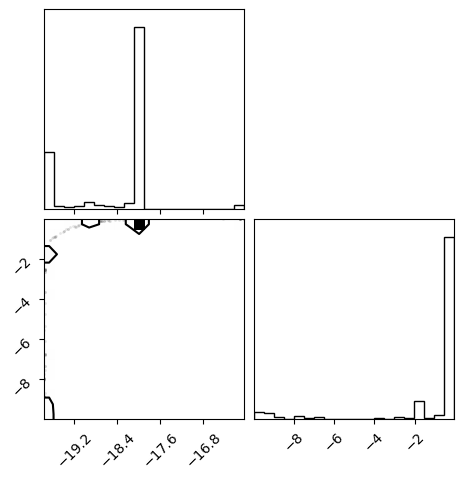

In [16]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples)

In [17]:
flat_samples

array([[-19.7580827 ,  -6.34627351],
       [-19.5961506 ,  -0.83546715],
       [-19.57529876,  -0.7903739 ],
       ...,
       [-18.01983444,  -0.02780444],
       [-18.0417457 ,  -0.02883045],
       [-18.04675602,  -0.02767996]])

In [18]:
np.median(samples[:,0]), np.median(samples[:,1]) #wants way too small mass?

(-18.028131432575222, -0.028003445941809736)

(array([2.0270e+04, 9.0100e+02, 1.0190e+03, 5.5000e+02, 6.6000e+01,
        2.5900e+02, 8.1000e+01, 9.7000e+01, 8.0390e+03, 6.8305e+04,
        1.0000e+01, 8.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 2.7000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.5000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00, 5.0000e+00,
        7.0000e+00, 5.0000e+00, 1.1000e+01, 1.2000e+01, 0.0000e+00,
        4.0000e+00, 3.9000e+01, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.3000e+01, 0.0000e+00, 0.0000e+00, 3.10

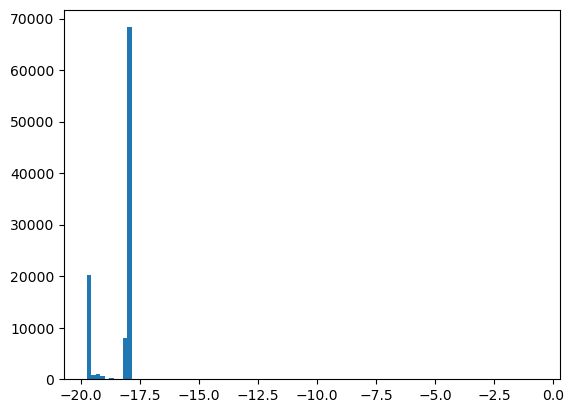

In [19]:
bins=100
plt.hist(samples[:,0], bins=bins)

In [1]:
bins=50
plt.hist(samples[:,1], bins=bins)

NameError: name 'plt' is not defined